# Importing labararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import os
# import opendatasets as od
from zipfile import ZipFile
from urllib.request import urlretrieve
# import opendatasets as od

# Downloading dataset from kaggle

In [2]:
# od.download('https://www.kaggle.com/competitions/titanic')

In [3]:
raw_df = pd.read_csv('train.csv')

In [4]:
raw_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
cabin_list = raw_df.Cabin.unique().tolist()

In [7]:
len(cabin_list)

148

# Droping usless columns

In [8]:
new_df = raw_df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

In [9]:
new_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
5,6,3,male,NaN,0,0,8.4583,Q,0
6,7,1,male,54.0,0,0,51.8625,S,0
7,8,3,male,2.0,3,1,21.0750,S,0
8,9,3,female,27.0,0,2,11.1333,S,1
9,10,2,female,14.0,1,0,30.0708,C,1


In [10]:
catagorical_col = new_df.select_dtypes('object').columns.tolist()

In [11]:
numerical_col = new_df.select_dtypes(include=np.number).columns.tolist()

In [12]:
catagorical_col

['Sex', 'Embarked']

In [13]:
numerical_col

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Imputing missing numeric values

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(strategy = 'mean').fit(new_df[numerical_col])

In [16]:
new_df[numerical_col]  = imputer.transform(new_df[numerical_col])

C:\Users\Mohit Bhilwara\AppData\Local\Temp\ipykernel_3540\3397103999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[numerical_col]  = imputer.transform(new_df[numerical_col])


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Survived     891 non-null    float64
dtypes: float64(7), object(2)
memory usage: 62.8+ KB


In [18]:
new_df.dropna(subset= ['Embarked'],inplace = True)

C:\Users\Mohit Bhilwara\AppData\Local\Temp\ipykernel_3540\139304151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(subset= ['Embarked'],inplace = True)


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Pclass       889 non-null    float64
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    float64
 5   Parch        889 non-null    float64
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
 8   Survived     889 non-null    float64
dtypes: float64(7), object(2)
memory usage: 69.5+ KB


In [20]:
new_df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035330,0.030300,-0.057686,-0.001657,0.012703,-0.005028
Pclass,-0.035330,1.000000,-0.327954,0.081656,0.016824,-0.548193,-0.335549
Age,0.030300,-0.327954,1.000000,-0.231875,-0.178232,0.088604,-0.074673
SibSp,-0.057686,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.034040
Parch,-0.001657,0.016824,-0.178232,0.414542,1.000000,0.217532,0.083151
Fare,0.012703,-0.548193,0.088604,0.160887,0.217532,1.000000,0.255290
Survived,-0.005028,-0.335549,-0.074673,-0.034040,0.083151,0.255290,1.000000


<AxesSubplot:>

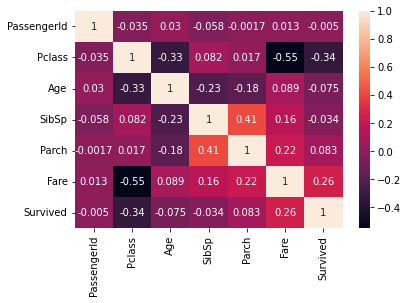

In [21]:
sns.heatmap(new_df.corr(),annot= True)

# Encoding Catagorical Data

In [22]:
# !pip install scikit-learn

In [23]:
# !pip list

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder= OneHotEncoder(sparse= False , handle_unknown = 'ignore').fit(new_df[catagorical_col])

C:\Users\Mohit Bhilwara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
encoded_cols = list(encoder.get_feature_names(catagorical_col))

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [ ]:
new_df[encoded_cols]= encoder.transform(new_df[catagorical_col])

In [ ]:
new_df

In [ ]:
data_set = new_df.drop(['Sex','Embarked'],axis = 1)

In [ ]:
data_set

In [ ]:
data_set.columns

In [ ]:
inputs_col = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target_col = ['Survived']

# split data into inputs and targets

In [ ]:
inputs_df = data_set[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [ ]:
target_df = data_set[['Survived']]

In [ ]:
inputs_df.head()

# Split into train and validation dataframe

In [ ]:
train_inputs, val_inputs, train_targets, val_targets =  train_test_split(inputs_df, target_df, test_size=0.25, random_state=42)